In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils import np_utils

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### 데이터 확인




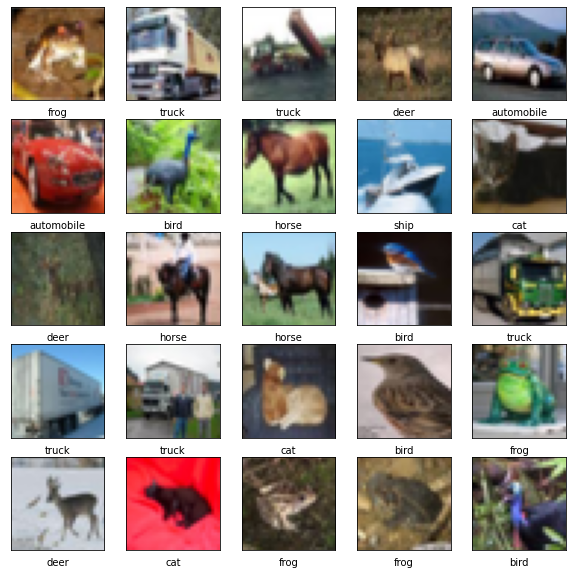

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### 원핫인코딩 + train,val,test 분류

In [6]:
import numpy as np

def get_preprocessed_ohe(img,label):
    images = np.array(img,dtype=np.float32)
    labels = np.array(label, dtype=np.float32)
    
    #one hot encoding
    oh_labels = np_utils.to_categorical(labels)
    return images, oh_labels

In [7]:
def get_data(train_images,test_images,train_labels,test_labels,validation=False,test_size=0.2):
    from sklearn.model_selection import train_test_split
    
    if validation:
        tr_images, val_images, tr_labels, val_labels = train_test_split(train_images,train_labels,test_size=test_size)
        tr_images,tr_labels = get_preprocessed_ohe(tr_images,tr_labels)
        val_images,val_labels = get_preprocessed_ohe(val_images,val_labels)
        test_images,test_labels = get_preprocessed_ohe(test_images,test_labels)
        
        return tr_images, val_images, test_images, tr_labels, val_labels, test_labels
    
    else:
        tr_images,tr_labels = get_preprocessing(tr_images,tr_labels)
        test_images,test_labels = get_preprocessing(test_images,test_labels)
        
        return tr_images, test_images, tr_labels, test_labels
 

In [15]:
tr_images, val_images, test_images, tr_labels, val_labels, test_labels = get_data(train_images, test_images,train_labels,test_labels,validation=True,test_size=0.3)

print(tr_images.shape)
print(val_images.shape)
print(test_images.shape)
print(tr_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 32, 32, 3)
(35000, 10)
(15000, 10)
(10000, 10, 2)


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(filters=100,kernel_size=3,padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=100,kernel_size=3,padding='same', activation='relu'))
model.add(layers.Conv2D(filters=100,kernel_size=3,padding='same', activation='relu',strides=1))
model.add(layers.Conv2D(filters=100,kernel_size=3,padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 100)       2800      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 100)       90100     
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 100)       90100     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 100)       90100     
                                                                 
 flatten_1 (Flatten)         (None, 102400)            0         
                                                                 
 dropout_1 (Dropout)         (None, 102400)            0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
### 모델훈련련

In [21]:
model.fit(tr_images, tr_labels, epochs=20, validation_data=(val_images, val_labels))
 

Epoch 1/20
1094/1094 [==============================] - 19s 17ms/step - loss: 2.0423 - accuracy: 0.2481 - val_loss: 1.6717 - val_accuracy: 0.4145
Epoch 2/20
1094/1094 [==============================] - 18s 16ms/step - loss: 1.5156 - accuracy: 0.4608 - val_loss: 1.3273 - val_accuracy: 0.5302
Epoch 3/20
1094/1094 [==============================] - 18s 16ms/step - loss: 1.2603 - accuracy: 0.5611 - val_loss: 1.1750 - val_accuracy: 0.5906
Epoch 4/20
1094/1094 [==============================] - 18s 16ms/step - loss: 1.1175 - accuracy: 0.6067 - val_loss: 1.1210 - val_accuracy: 0.6090
Epoch 5/20
1094/1094 [==============================] - 18s 16ms/step - loss: 0.9871 - accuracy: 0.6556 - val_loss: 1.1419 - val_accuracy: 0.6025
Epoch 6/20
1094/1094 [==============================] - 18s 16ms/step - loss: 0.8565 - accuracy: 0.7019 - val_loss: 1.1400 - val_accuracy: 0.6077
Epoch 7/20
1094/1094 [==============================] - 18s 16ms/step - loss: 0.7416 - accuracy: 0.7403 - val_loss: 1.2499 -